# 4. Drawing and Masking

### Get coordinates of region of interest (ROI)

In [2]:
# imports..
import skimage
from skimage.viewer import ImageViewer
import numpy as np

/Users/gmoenke/miniconda3/envs/anaconda/lib/python3.7/site-packages/skimage/viewer/utils/core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


In [ ]:
img = skimage.io.imread('../data/maize-roots.tif')

In [ ]:
viewer = ImageViewer(img)

In [ ]:
viewer.show()

### Creating the Mask

In [ ]:
# boolean array
mask = np.ones(shape=img.shape[:2], dtype="bool")

In [ ]:
# get coordinates of region to unmask
rr, cc = skimage.draw.rectangle(start=(357, 44), end=(740, 720))

In [ ]:
viewer = ImageViewer(mask)
viewer.show()

### Exercise: Drawing Practice

Play around with the different draw methods skimage provides:
* skimage.draw.circle
* skimage.draw.line
* skimage.draw.polygon
* ...

Draw a few different shapes in different colors onto a canvas.

In [ ]:
%load ../exercises/04-DrawPractice.py

In [ ]:
# display the results
viewer = ImageViewer(image)
viewer.show()

#### Bonus Exercise 1: Drawing a Grid
Use for-loops to iteratively draw an evenly spaced grid onto a grayscale image.

In [9]:
rmax, cmax = 400,400
step = 20
canvas = np.zeros( (rmax, cmax), dtype = np.uint8)
# vertical lines
for c in np.arange(0, cmax, step):
    rr, cc = skimage.draw.line(r0 = 0, c0 =  c, r1 = rmax-1, c1 = c)
    canvas[rr,cc] = 255
# horizontal lines
for r in np.arange(0, rmax, step):
    rr, cc = skimage.draw.line(r0 = r, c0 = 0, r1 = r, c1 = cmax-1)
    canvas[rr,cc] = 255
    
v = ImageViewer(canvas)
v.show()

[]

#### Bonus Exercise 2: Pretty Random
Randomly place **N** (say 20..) randomly sized circles onto an image. 
_Hint: use np.random.randint to generate random coordinates and radii. Include a safety margin so that no circle reaches outside of the canvas and raises an IndexError._

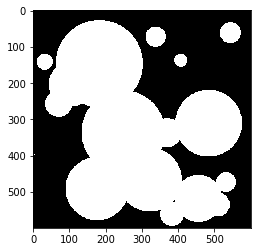

In [53]:
# for better plotting
%matplotlib inline
import matplotlib.pyplot as plt

rmax, cmax = 600,600
Ncircles = 20
canvas = np.zeros( (rmax, cmax), dtype = np.uint8)

for i in range(Ncircles):
    
    # get random center coordinates
    r0 = np.random.randint(0,rmax)
    c0 = np.random.randint(0,cmax)
    
    # compute safety margin
    max_r = min(r0, rmax - r0)
    max_c = min(c0, cmax - c0)
    rad_max = min(max_r, max_c)
    
    # get random radius
    rad = np.random.randint(0, rad_max)
    
    # draw the circle
    rr,cc = skimage.draw.circle(r0, c0, rad)
    canvas[rr,cc] = 255
    
plt.imshow(canvas, cmap = 'gray')

### Applying the Mask

In [ ]:
# recreate the rectangular mask
mask = np.ones(img.shape[:2], dtype = bool)
rr,cc = skimage.draw.rectangle( start=(357, 44), end=(740, 720))
mask[rr,cc] = False

In [ ]:
# use boolean indexing to apply the mask
img[mask] = 0

In [ ]:
# show the masked image
viewer = ImageViewer(img)
viewer.show()

### Exercise: Masking a 96-well plate image

Given the well coordinates, create a mask with a circular region of interest for each well.

In [1]:
%load ../exercises/04-MaskWellplate.py

In [ ]:
# create empty mask
mask = np.ones(image.shape[:2], dtype = bool)

In [ ]:
# loop over coordinates
for index in df.index:
    
    well = df.loc[index]
    c = well['c']
    r = well['r']
    
    rr,cc = skimage.draw.circle(r,c, radius = 15)
    mask[rr,cc] = False
    
# apply the mask    
image[mask] = 0
# show result
viewer = ImageViewer(image)
viewer.show()